# Defining Directories and categories first print data

[[128 118 131 ...  95  95  95]
 [127 118 130 ...  95  95  95]
 [126 120 130 ...  95  95  95]
 ...
 [228 228 227 ...  24  14  11]
 [222 222 222 ...  19  15  15]
 [219 219 220 ...  18  15  14]]


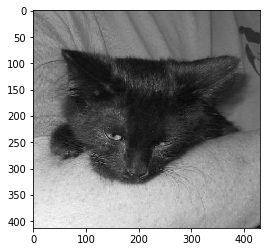

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd
from keras.utils import np_utils

TRAIN_DATADIR = "/home/reinaldo/Documentos/PetImages/database/"
TEST_DATADIR = "/home/reinaldo/Documentos/PetImages/ALLDATA/"

TRAIN_DATADIR2 = "/home/reinaldo/Documentos/PetImages2/database/"
TEST_DATADIR2 = "/home/reinaldo/Documentos/PetImages2/ALLDATA/"
TRAIN_DATADIR3 = "/home/reinaldo/Documentos/PetImages3/database/"
TEST_DATADIR3 = "/home/reinaldo/Documentos/PetImages3/ALLDATA/"

CATEGORIES = ["Dog", "Cat"]
img_array = []


for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        print(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
print(img_array)

[[112 112 113 ... 125 125 123]
 [112 112 113 ... 125 124 122]
 [111 111 112 ... 124 124 122]
 ...
 [126 123 122 ... 118 109 111]
 [125 122 121 ... 120 112 118]
 [127 124 123 ... 121 115 114]]


In [3]:
print(img_array.shape)

(220, 169)


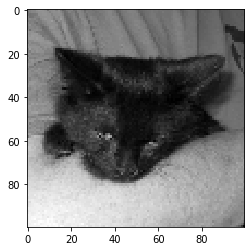

(100, 100)


In [23]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.imshow(new_array2, cmap='gray')
plt.show()
print(new_array.shape)

# Create training and test data

In [24]:
training_data = []
test_data = []
training_data2 = []
test_data2 = []
training_data3 = []
test_data3 = []
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR,category)  # create path to dogs and cats to train
        path_test = TEST_DATADIR  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            test_data.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass            

def create_training_data2():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR2,category)  # create path to dogs and cats to train
        path_test = TEST_DATADIR2  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data2.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            test_data2.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass            
def create_training_data3():
    for category in CATEGORIES:  # do dogs and cats

        path_train = os.path.join(TRAIN_DATADIR3,category)  # create path to dogs and cats to train
        path_test = TEST_DATADIR3  # create path to dogs and cats to test
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path_train)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path_train,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data3.append([new_array, class_num, int(img.split('.')[0])])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    for img in tqdm(os.listdir(path_test)):  # iterate over each image per dogs and cats
        try:
            img_array = cv2.imread(os.path.join(path_test,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array2 = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
            test_data3.append([new_array2, class_num,int(img.split('.')[0])])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass            

create_training_data()

print(len(training_data))
print(len(test_data))
print(training_data)


100%|██████████| 25000/25000 [04:11<00:00, 99.44it/s] 


200
24946
[[array([[126, 127, 133, ...,  93,  92,  95],
       [116, 125, 131, ...,  93,  92,  95],
       [116, 112, 116, ...,  94,  91,  92],
       ...,
       [230, 231, 227, ..., 135, 130, 119],
       [227, 226, 231, ..., 126, 113,  87],
       [225, 229, 229, ...,  98,  62,  19]], dtype=uint8), 0, 9020], [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0, 10230], [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0, 16025], [array([[139, 137, 135, ..., 140, 139, 138],
       [143, 142, 140, ..., 143, 142

In [6]:
import random

random.shuffle(training_data)
random.shuffle(test_data)

# Reshape training and test data

In [7]:
X_test = []
X_train = []
y_test = []
y_train = []
z_train = []
z_test = []

for features,label,file_name in training_data:
    X_train.append(features)
    y_train.append(label)
    z_train.append(file_name)

print(X_train[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

for features,label,file_name in test_data:
    X_test.append(features)
    y_test.append(label)
    z_test.append(file_name)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 93]
   [ 78]
   [ 88]
   ...
   [  5]
   [ 10]
   [  6]]

  [[ 91]
   [ 90]
   [ 93]
   ...
   [ 10]
   [  8]
   [  8]]

  [[ 93]
   [107]
   [ 79]
   ...
   [ 12]
   [ 16]
   [  5]]

  ...

  [[  9]
   [ 10]
   [  5]
   ...
   [ 10]
   [ 16]
   [ 11]]

  [[  6]
   [  2]
   [  3]
   ...
   [ 12]
   [  9]
   [ 12]]

  [[  3]
   [  8]
   [  8]
   ...
   [  4]
   [ 12]
   [  7]]]]


In [8]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test,pickle_out)

pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train,pickle_out)

pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


# Saving data on pickle files

In [9]:
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Apply data on first training machine

In [10]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

y_test = np_utils.to_categorical(y_test,2)
y_train = np_utils.to_categorical(y_train,2)

X_train = X_train/255.0
X_test = X_test/255.0

model = Sequential()

model.add(Conv2D(20, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(20, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(20))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=5, validation_split=0.1)

print("Calculating prediction")
prediction = model.predict(X_test, batch_size=20)
print(prediction)
print("done")


W0731 13:36:14.571979 140365071054464 deprecation.py:506] From /home/reinaldo/masters/ai/.venv/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 180 samples, validate on 20 samples
Epoch 1/5
180/180 [==============================] - 1s 7ms/sample - loss: 0.9990 - categorical_accuracy: 0.5611 - val_loss: 0.6054 - val_categorical_accuracy: 0.4000
Epoch 2/5
180/180 [==============================] - 1s 6ms/sample - loss: 0.4057 - categorical_accuracy: 0.8278 - val_loss: 0.2985 - val_categorical_accuracy: 0.9500
Epoch 3/5
180/180 [==============================] - 1s 5ms/sample - loss: 0.1428 - categorical_accuracy: 0.9889 - val_loss: 0.1566 - val_categorical_accuracy: 0.9000
Epoch 4/5
180/180 [==============================] - 1s 5ms/sample - loss: 0.0515 - categorical_accuracy: 0.9889 - val_loss: 0.1383 - val_categorical_accuracy: 0.9000
Epoch 5/5
180/180 [==============================] - 1s 6ms/sample - loss: 0.0358 - categorical_accuracy: 0.9889 - val_loss: 0.0557 - val_categorical_accuracy: 1.0000
Calculating prediction
[[0.9805449  0.01945507]
 [0.9445301  0.05546989]
 [0.99214727 0.00785271]
 ...
 [0.06264875 0.93

In [11]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model2.add(Dense(64))

model2.add(Dense(2))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
model2.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

print("Calculating prediction")
prediction2 = model2.predict(X_test, batch_size=32)
print(prediction2)
print("done")


Train on 180 samples, validate on 20 samples
Epoch 1/5
180/180 [==============================] - 1s 8ms/sample - loss: 1.5756 - categorical_accuracy: 0.5000 - val_loss: 1.1076 - val_categorical_accuracy: 0.4000
Epoch 2/5
180/180 [==============================] - 1s 7ms/sample - loss: 0.3981 - categorical_accuracy: 0.8333 - val_loss: 0.2407 - val_categorical_accuracy: 0.9000
Epoch 3/5
180/180 [==============================] - 1s 7ms/sample - loss: 0.1271 - categorical_accuracy: 0.9889 - val_loss: 0.1201 - val_categorical_accuracy: 0.9500
Epoch 4/5
180/180 [==============================] - 1s 7ms/sample - loss: 0.0454 - categorical_accuracy: 0.9944 - val_loss: 0.1017 - val_categorical_accuracy: 0.9500
Epoch 5/5
180/180 [==============================] - 1s 7ms/sample - loss: 0.0325 - categorical_accuracy: 0.9889 - val_loss: 0.1162 - val_categorical_accuracy: 0.9500
Calculating prediction
[[0.97746974 0.02253033]
 [0.97976536 0.02023466]
 [0.98866045 0.01133959]
 ...
 [0.04945841 0.95

In [34]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(16, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model3.add(Dense(10))

model3.add(Dense(2))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])
model3.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)

print("Calculating prediction")
prediction3 = model3.predict(X_test, batch_size=16)
print(prediction3)
print("done")


Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.6635 - categorical_accuracy: 0.5714 - val_loss: 0.7127 - val_categorical_accuracy: 0.4333
Epoch 2/5
140/140 [==============================] - 0s 4ms/sample - loss: 0.3616 - categorical_accuracy: 0.8214 - val_loss: 0.2141 - val_categorical_accuracy: 0.9667
Epoch 3/5
140/140 [==============================] - 0s 3ms/sample - loss: 0.1642 - categorical_accuracy: 0.9786 - val_loss: 0.0473 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 0s 4ms/sample - loss: 0.0304 - categorical_accuracy: 1.0000 - val_loss: 0.0137 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.0066 - categorical_accuracy: 1.0000 - val_loss: 0.0056 - val_categorical_accuracy: 1.0000
Calculating prediction
[[0.14567739 0.8543226 ]
 [0.7891922  0.21080784]
 [0.99851686 0.00148309]
 ...
 [0.19570817 0.80

# sorting the predictions without lose index 

In [13]:
label_pred = np.insert(prediction, 2, z_test , axis =1)
label_pred2 = np.insert(prediction2, 2, z_test , axis =1)
label_pred3 = np.insert(prediction3, 2, z_test , axis =1)
print(label_pred)
print(label_pred.shape)

[[9.8054492e-01 1.9455066e-02 2.2060000e+03]
 [9.4453013e-01 5.5469893e-02 1.8440000e+03]
 [9.9214727e-01 7.8527117e-03 1.2250000e+03]
 ...
 [6.2648751e-02 9.3735117e-01 3.0900000e+03]
 [9.9165326e-01 8.3467271e-03 7.4330000e+03]
 [3.1921381e-01 6.8078619e-01 1.1342000e+04]]
(24946, 3)


In [14]:
#cat_sorte = np.sort(label_pred, axis = 0)[::-1]
cat_sort = label_pred[label_pred[:,0].argsort()]
dog_sort = label_pred[label_pred[:,1].argsort()]

cat_sort2 = label_pred2[label_pred2[:,0].argsort()]
dog_sort2 = label_pred2[label_pred2[:,1].argsort()]

cat_sort3 = label_pred3[label_pred3[:,0].argsort()]
dog_sort3 = label_pred3[label_pred3[:,1].argsort()]
print(cat_sort[::-1])
print(dog_sort[::-1])


[[9.9999988e-01 6.9822448e-08 1.8565000e+04]
 [9.9999988e-01 6.1154090e-08 1.6460000e+03]
 [9.9999952e-01 4.7808612e-07 2.4115000e+04]
 ...
 [6.0087018e-07 9.9999940e-01 1.4750000e+03]
 [8.3988702e-08 9.9999988e-01 2.0507000e+04]
 [7.9532704e-08 9.9999988e-01 1.0636000e+04]]
[[7.9532704e-08 9.9999988e-01 1.0636000e+04]
 [8.3988702e-08 9.9999988e-01 2.0507000e+04]
 [6.0087018e-07 9.9999940e-01 1.4750000e+03]
 ...
 [9.9999952e-01 4.7808612e-07 2.4115000e+04]
 [9.9999988e-01 6.9822448e-08 1.8565000e+04]
 [9.9999988e-01 6.1154090e-08 1.6460000e+03]]


#odenar e escolher 100 melhores de cada categoria mo

# Moving images to paths of training

In [15]:
import shutil as st

ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
ja_treinado2 ="/home/reinaldo/Documentos/PetImages2/ja_treinado" 
ja_treinado3 ="/home/reinaldo/Documentos/PetImages3/ja_treinado" 
for img in os.listdir(TRAIN_DATADIR+"/Cat/"):
    st.move(TRAIN_DATADIR+"/Cat/"+img,ja_treinado+"/Cat/"+img)
for img in os.listdir(TRAIN_DATADIR+"/Dog/"):
    st.move(TRAIN_DATADIR+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    
for img in os.listdir(TRAIN_DATADIR2+"/Cat/"):
    st.move(TRAIN_DATADIR2+"/Cat/"+img,ja_treinado+"/Cat/"+img)
for img in os.listdir(TRAIN_DATADIR2+"/Dog/"):
    st.move(TRAIN_DATADIR2+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    
for img in os.listdir(TRAIN_DATADIR3+"/Cat/"):
    st.move(TRAIN_DATADIR3+"/Cat/"+img,ja_treinado+"/Cat/"+img)
for img in os.listdir(TRAIN_DATADIR3+"/Dog/"):
    st.move(TRAIN_DATADIR3+"/Dog/"+img,ja_treinado+"/Dog/"+img)


# Moving better test images from training

In [16]:
for i in range(100):
    #path of test to training cats
    st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
    #path of test to training dogs
    st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")
for i in range(100):
    #path of test to training cats
    st.move(TEST_DATADIR2+str(int(cat_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Cat/"+str(int(cat_sort2[i][2]))+".jpg")
    #path of test to training dogs
    st.move(TEST_DATADIR2+str(int(dog_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Dog/"+str(int(dog_sort2[i][2]))+".jpg")
for i in range(100):
    #path of test to training cats
    st.move(TEST_DATADIR3+str(int(cat_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Cat/"+str(int(cat_sort3[i][2]))+".jpg")
    #path of test to training dogs
    st.move(TEST_DATADIR3+str(int(dog_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Dog/"+str(int(dog_sort3[i][2]))+".jpg")
    
    

# New training on the loop

In [17]:
ite=0
while os.listdir(TEST_DATADIR) and ite<5:
    ite=ite+1
    training_data = []
    test_data = []
    create_training_data()
    print("tamanho de training data")
    print(len(training_data))
    print("tamanho de test data")
    print(len(test_data))
    random.shuffle(training_data)
    random.shuffle(test_data)

    X_test = []
    X_train = []
    y_test = []
    y_train = []
    z_train = []
    z_test = []

    for features,label,file_name in training_data:
        X_train.append(features)
        y_train.append(label)
        z_train.append(file_name)

    X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    for features,label,file_name in test_data:
        X_test.append(features)
        y_test.append(label)
        z_test.append(file_name)

    X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_test = np_utils.to_categorical(y_test,2)
    y_train = np_utils.to_categorical(y_train,2)

    X_train = X_train/255.0
    X_test = X_test/255.0

    model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
    print("Calculating prediction")
    prediction = model.predict(X_test, batch_size=1)
    print("done")
    pred_index = np.argsort(prediction)

    label_pred = np.insert(prediction, 2, z_test , axis =1)

    print(label_pred)
    print(label_pred.shape)

    cat_sort = label_pred[label_pred[:,0].argsort()]
    dog_sort = label_pred[label_pred[:,1].argsort()]
    

    ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
    for img in os.listdir(TRAIN_DATADIR+"/Cat/"):
        st.move(TRAIN_DATADIR+"/Cat/"+img,ja_treinado+"/Cat/"+img)
    for img in os.listdir(TRAIN_DATADIR+"/Dog/"):
        st.move(TRAIN_DATADIR+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    if len(os.listdir(TEST_DATADIR))>100:
        for i in range(100):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")
            except:
                pass
    else:
        
        for i in range(len(os.listdir(TEST_DATADIR))):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR+str(int(cat_sort[i][2]))+".jpg",TRAIN_DATADIR+"Cat/"+str(int(cat_sort[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR+str(int(dog_sort[i][2]))+".jpg",TRAIN_DATADIR+"Dog/"+str(int(dog_sort[i][2]))+".jpg")
            except:
                pass

100%|██████████| 24800/24800 [02:09<00:00, 191.75it/s]


tamanho de training data
200
tamanho de test data
24746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 1.1108e-04 - categorical_accuracy: 1.0000 - val_loss: 4.8100e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 6ms/sample - loss: 4.0081e-04 - categorical_accuracy: 1.0000 - val_loss: 0.0017 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 6ms/sample - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0023 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 0.0012 - categorical_accuracy: 1.0000 - val_loss: 0.0014 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 6.9094e-04 - categorical_accuracy: 1.0000 - val_loss: 6.0586e-04 - val_categorical_accuracy: 1.0000
Calculating prediction
done
[[9.2959934e-01 

100%|██████████| 24600/24600 [00:28<00:00, 860.70it/s]


tamanho de training data
200
tamanho de test data
24546
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 4.7561e-04 - categorical_accuracy: 1.0000 - val_loss: 3.9532e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 5ms/sample - loss: 2.9083e-04 - categorical_accuracy: 1.0000 - val_loss: 2.5615e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.8681e-04 - categorical_accuracy: 1.0000 - val_loss: 1.7718e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 1.2767e-04 - categorical_accuracy: 1.0000 - val_loss: 1.3201e-04 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 9.4935e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0496e-04 - val_categorical_accuracy: 1.0000
Calculating prediction


 68%|██████▊   | 68/100 [00:00<00:00, 679.04it/s]

done
[[7.8913903e-01 2.1086095e-01 6.9370000e+03]
 [9.5958304e-01 4.0416900e-02 3.0610000e+03]
 [4.5293239e-03 9.9547064e-01 1.8499000e+04]
 ...
 [8.3984828e-01 1.6015173e-01 4.5980000e+03]
 [3.7349206e-01 6.2650794e-01 1.4133000e+04]
 [9.8741698e-01 1.2582970e-02 1.8973000e+04]]
(24546, 3)


100%|██████████| 24400/24400 [00:28<00:00, 855.30it/s]


tamanho de training data
200
tamanho de test data
24346
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 2.2284e-04 - categorical_accuracy: 1.0000 - val_loss: 1.7778e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.6576e-04 - categorical_accuracy: 1.0000 - val_loss: 1.3318e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 5ms/sample - loss: 1.2427e-04 - categorical_accuracy: 1.0000 - val_loss: 1.0034e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 9.4638e-05 - categorical_accuracy: 1.0000 - val_loss: 7.7466e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 7.3281e-05 - categorical_accuracy: 1.0000 - val_loss: 6.2141e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[1.7526167e-02 9.8247379e-01 1.0143000e+04]
 [3.0356797e-03 9.9696428e-01 5.7250000e+03]
 [9.9260861e-01 7.3913969e-03 1.4594000e+04]
 ...
 [9.4502437e-01 5.4975677e-02 1.1700000e+04]
 [9.5186281e-01 4.8137162e-02 2.5760000e+03]
 [7.4917746e-01 2.5082257e-01 3.7490000e+03]]
(24346, 3)


100%|██████████| 24200/24200 [00:28<00:00, 852.28it/s]


tamanho de training data
200
tamanho de test data
24146
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 5ms/sample - loss: 1.1118e-04 - categorical_accuracy: 1.0000 - val_loss: 9.3359e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 6ms/sample - loss: 8.6552e-05 - categorical_accuracy: 1.0000 - val_loss: 7.4532e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 6ms/sample - loss: 6.9067e-05 - categorical_accuracy: 1.0000 - val_loss: 6.1690e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 5.7282e-05 - categorical_accuracy: 1.0000 - val_loss: 5.3966e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 6ms/sample - loss: 5.0421e-05 - categorical_accuracy: 1.0000 - val_loss: 4.9379e-05 - val_categorical_accuracy: 1.0000
Calculating prediction
d

100%|██████████| 24000/24000 [00:24<00:00, 975.30it/s] 


tamanho de training data
200
tamanho de test data
23946
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 7.8789e-05 - categorical_accuracy: 1.0000 - val_loss: 6.7466e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 4ms/sample - loss: 7.0639e-05 - categorical_accuracy: 1.0000 - val_loss: 6.0979e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 4ms/sample - loss: 6.3709e-05 - categorical_accuracy: 1.0000 - val_loss: 5.5838e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 4ms/sample - loss: 5.8502e-05 - categorical_accuracy: 1.0000 - val_loss: 5.1578e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 5ms/sample - loss: 5.4291e-05 - categorical_accuracy: 1.0000 - val_loss: 4.7823e-05 - val_categorical_accuracy: 1.0000
Calculating prediction
d

# Loop backpropagation for Second model

In [18]:
ite=0
while os.listdir(TEST_DATADIR2) and ite<5:
    ite=ite+1
    training_data = []
    test_data = []
    create_training_data2()
    print("tamanho de training data")
    print(len(training_data))
    print("tamanho de test data")
    print(len(test_data))
    random.shuffle(training_data)
    random.shuffle(test_data)

    X_test = []
    X_train = []
    y_test = []
    y_train = []
    z_train = []
    z_test = []

    for features,label,file_name in training_data:
        X_train.append(features)
        y_train.append(label)
        z_train.append(file_name)

    X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    for features,label,file_name in test_data:
        X_test.append(features)
        y_test.append(label)
        z_test.append(file_name)

    X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_test = np_utils.to_categorical(y_test,2)
    y_train = np_utils.to_categorical(y_train,2)

    X_train = X_train/255.0
    X_test = X_test/255.0

    model2.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
    print("Calculating prediction")
    prediction2 = model2.predict(X_test, batch_size=1)
    print("done")
    pred_index = np.argsort(prediction2)

    label_pred2 = np.insert(prediction2, 2, z_test , axis =1)

    print(label_pred2)
    print(label_pred2.shape)

    cat_sort2 = label_pred2[label_pred2[:,0].argsort()]
    dog_sort2 = label_pred2[label_pred2[:,1].argsort()]
    

    ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
    for img in os.listdir(TRAIN_DATADIR2+"/Cat/"):
        st.move(TRAIN_DATADIR2+"/Cat/"+img,ja_treinado+"/Cat/"+img)
    for img in os.listdir(TRAIN_DATADIR2+"/Dog/"):
        st.move(TRAIN_DATADIR2+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    if len(os.listdir(TEST_DATADIR2))>100:
        for i in range(100):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR2+str(int(cat_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Cat/"+str(int(cat_sort2[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR2+str(int(dog_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Dog/"+str(int(dog_sort2[i][2]))+".jpg")
            except:
                pass
    else:
        
        for i in range(len(os.listdir(TEST_DATADIR2))):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR2+str(int(cat_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Cat/"+str(int(cat_sort2[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR2+str(int(dog_sort2[i][2]))+".jpg",TRAIN_DATADIR2+"Dog/"+str(int(dog_sort2[i][2]))+".jpg")
            except:
                pass

100%|██████████| 23800/23800 [00:22<00:00, 1039.97it/s]


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 7ms/sample - loss: 0.0211 - categorical_accuracy: 1.0000 - val_loss: 0.0055 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 7ms/sample - loss: 0.0016 - categorical_accuracy: 1.0000 - val_loss: 1.7733e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.4114e-04 - categorical_accuracy: 1.0000 - val_loss: 1.3971e-04 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.4532e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5913e-04 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.9215e-04 - categorical_accuracy: 1.0000 - val_loss: 1.7764e-04 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[4.8766166e-02 9.5123386e-01 1.5876000e+04]
 [9.9672592e-01 3.2740340e-03 9.9580000e+03]
 [1.7168230e-03 9.9828315e-01 2.1119000e+04]
 ...
 [6.5430636e-03 9.9345690e-01 1.6192000e+04]
 [7.0406997e-01 2.9592997e-01 2.0405000e+04]
 [5.7022821e-06 9.9999428e-01 4.2260000e+03]]
(23746, 3)


100%|██████████| 23800/23800 [00:23<00:00, 996.67it/s] 


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.6840e-04 - categorical_accuracy: 1.0000 - val_loss: 2.2022e-04 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.2306e-04 - categorical_accuracy: 1.0000 - val_loss: 1.5223e-04 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 7ms/sample - loss: 1.4082e-04 - categorical_accuracy: 1.0000 - val_loss: 9.9949e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 7ms/sample - loss: 8.7384e-05 - categorical_accuracy: 1.0000 - val_loss: 6.9251e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 7ms/sample - loss: 6.0313e-05 - categorical_accuracy: 1.0000 - val_loss: 5.0871e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[9.2918086e-08 9.9999988e-01 8.7800000e+02]
 [1.2836752e-03 9.9871635e-01 6.0040000e+03]
 [3.6817538e-03 9.9631822e-01 9.9290000e+03]
 ...
 [2.5888946e-06 9.9999738e-01 1.6657000e+04]
 [9.1217089e-01 8.7829135e-02 1.8941000e+04]
 [4.4573066e-03 9.9554271e-01 1.0587000e+04]]
(23746, 3)


100%|██████████| 23800/23800 [00:22<00:00, 1042.35it/s]


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 6ms/sample - loss: 5.4807e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3164e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 7ms/sample - loss: 4.3927e-05 - categorical_accuracy: 1.0000 - val_loss: 1.0474e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 7ms/sample - loss: 3.4682e-05 - categorical_accuracy: 1.0000 - val_loss: 8.6445e-06 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.9002e-05 - categorical_accuracy: 1.0000 - val_loss: 7.3591e-06 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 7ms/sample - loss: 2.5288e-05 - categorical_accuracy: 1.0000 - val_loss: 6.4273e-06 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[5.7517315e-07 9.9999940e-01 1.3216000e+04]
 [6.3707959e-03 9.9362916e-01 1.1750000e+03]
 [6.8722751e-05 9.9993122e-01 1.8357000e+04]
 ...
 [1.4991802e-08 1.0000000e+00 1.5533000e+04]
 [3.4382993e-01 6.5617007e-01 2.3075000e+04]
 [7.9050415e-06 9.9999213e-01 2.5170000e+03]]
(23746, 3)


100%|██████████| 23800/23800 [00:22<00:00, 1044.27it/s]


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.2365e-05 - categorical_accuracy: 1.0000 - val_loss: 2.7179e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.1272e-05 - categorical_accuracy: 1.0000 - val_loss: 2.5201e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.0458e-05 - categorical_accuracy: 1.0000 - val_loss: 2.3727e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 6ms/sample - loss: 9.7901e-06 - categorical_accuracy: 1.0000 - val_loss: 2.2597e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 6ms/sample - loss: 9.3261e-06 - categorical_accuracy: 1.0000 - val_loss: 2.1615e-05 - val_categorical_accuracy: 1.0000
Calculating prediction


  0%|          | 0/100 [00:00<?, ?it/s]

done
[[6.6416526e-01 3.3583474e-01 4.7790000e+03]
 [2.3802696e-03 9.9761969e-01 2.0228000e+04]
 [2.9146895e-04 9.9970847e-01 5.4220000e+03]
 ...
 [6.3599974e-01 3.6400029e-01 1.8908000e+04]
 [9.0331007e-03 9.9096686e-01 2.3831000e+04]
 [4.2577925e-01 5.7422072e-01 1.2535000e+04]]
(23746, 3)


100%|██████████| 23800/23800 [00:20<00:00, 1179.53it/s]


tamanho de training data
200
tamanho de test data
23746
Train on 140 samples, validate on 60 samples
Epoch 1/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.1097e-05 - categorical_accuracy: 1.0000 - val_loss: 1.5693e-05 - val_categorical_accuracy: 1.0000
Epoch 2/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.0635e-05 - categorical_accuracy: 1.0000 - val_loss: 1.5061e-05 - val_categorical_accuracy: 1.0000
Epoch 3/5
140/140 [==============================] - 1s 6ms/sample - loss: 1.0232e-05 - categorical_accuracy: 1.0000 - val_loss: 1.4430e-05 - val_categorical_accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 1s 5ms/sample - loss: 9.7705e-06 - categorical_accuracy: 1.0000 - val_loss: 1.3877e-05 - val_categorical_accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 1s 6ms/sample - loss: 9.3745e-06 - categorical_accuracy: 1.0000 - val_loss: 1.3335e-05 - val_categorical_accuracy: 1.0000
Calculating prediction
d

# Loop backpropagation for Model 3

In [33]:
create_training_data3()

100%|██████████| 25000/25000 [01:25<00:00, 292.50it/s]


In [38]:
ite=0
while os.listdir(TEST_DATADIR3) and ite<5:
    ite=ite+1
    training_data3 = []
    test_data3 = []
    create_training_data3()
    print("tamanho de training data")
    print(len(training_data3))
    print("tamanho de test data")
    print(len(test_data3))
    random.shuffle(training_data3)
    random.shuffle(test_data3)

    X_test = []
    X_train = []
    y_test = []
    y_train = []
    z_train3 = []
    z_test3 = []

    for features,label,file_name in training_data3:
        X_train.append(features)
        y_train.append(label)
        z_train3.append(file_name)

    X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    for features,label,file_name in test_data3:
        X_test.append(features)
        y_test.append(label)
        z_test3.append(file_name)

    X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_test = np_utils.to_categorical(y_test,2)
    y_train = np_utils.to_categorical(y_train,2)

    X_train = X_train/255.0
    X_test = X_test/255.0

    model3.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
    print("Calculating prediction")
    prediction = model3.predict(X_test, batch_size=1)
    print("done")
    pred_index = np.argsort(prediction3)

    label_pred3 = np.insert(prediction3, 2, z_test3 , axis =1)

    print(label_pred3)
    print(label_pred3.shape)

    cat_sort3 = label_pred3[label_pred3[:,0].argsort()]
    dog_sort3 = label_pred3[label_pred3[:,1].argsort()]
    

    ja_treinado ="/home/reinaldo/Documentos/PetImages/ja_treinado" 
    for img in os.listdir(TRAIN_DATADIR3+"/Cat/"):
        st.move(TRAIN_DATADIR+"/Cat/"+img,ja_treinado+"/Cat/"+img)
    for img in os.listdir(TRAIN_DATADIR3+"/Dog/"):
        st.move(TRAIN_DATADIR3+"/Dog/"+img,ja_treinado+"/Dog/"+img)
    if len(os.listdir(TEST_DATADIR3))>100:
        for i in range(100):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR3+str(int(cat_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Cat/"+str(int(cat_sort3[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR3+str(int(dog_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Dog/"+str(int(dog_sort3[i][2]))+".jpg")
            except:
                pass
    else:
        
        for i in range(len(os.listdir(TEST_DATADIR3))):
            #path of test to training cats
            try:
                st.move(TEST_DATADIR3+str(int(cat_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Cat/"+str(int(cat_sort3[i][2]))+".jpg")
            #path of test to training dogs
                st.move(TEST_DATADIR3+str(int(dog_sort3[i][2]))+".jpg",TRAIN_DATADIR3+"Dog/"+str(int(dog_sort3[i][2]))+".jpg")
            except:
                pass

100%|██████████| 24800/24800 [00:24<00:00, 1007.61it/s]


tamanho de training data
398
tamanho de test data
24746
Train on 278 samples, validate on 120 samples
Epoch 1/5
278/278 [==============================] - 1s 3ms/sample - loss: 0.3289 - categorical_accuracy: 0.8201 - val_loss: 0.3262 - val_categorical_accuracy: 0.8667
Epoch 2/5
278/278 [==============================] - 1s 3ms/sample - loss: 0.3227 - categorical_accuracy: 0.8273 - val_loss: 0.3288 - val_categorical_accuracy: 0.8333
Epoch 3/5
278/278 [==============================] - 1s 3ms/sample - loss: 0.3074 - categorical_accuracy: 0.8345 - val_loss: 0.3323 - val_categorical_accuracy: 0.8417
Epoch 4/5
278/278 [==============================] - 1s 4ms/sample - loss: 0.2852 - categorical_accuracy: 0.8525 - val_loss: 0.3282 - val_categorical_accuracy: 0.8667
Epoch 5/5
278/278 [==============================] - 1s 4ms/sample - loss: 0.2626 - categorical_accuracy: 0.8741 - val_loss: 0.3367 - val_categorical_accuracy: 0.8417
Calculating prediction
done


ValueError: could not broadcast input array from shape (24746,1) into shape (24946,1)

In [20]:
print("Your network is working properly")

Your network is working properly


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)